In [1]:
# Import necessary models
import pyspark
import pyspark.sql as pyspark_sql
import pyspark.sql.functions as pyspark_functions
from pyspark import SparkConf

In [2]:
# Creating spark instance
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()


In [3]:
# Reading the dataset
mon_kur_jaf_data = spark.read.csv("Datasets/mon_kur_jaf_output.csv", header=None, inferSchema=True)
# Data Schema
mon_kur_jaf_data.printSchema()


root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)


In [4]:
# Basic overview of the dataset
mon_kur_jaf_data.show()


+--------------------+------------------+----------+----------+
|                 _c0|               _c1|       _c2|       _c3|
+--------------------+------------------+----------+----------+
|                null|Bibile, Monaragala|2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|2019-01-07|2019-01-08|
|                null|Bibile, Monaragala|2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|2019-01-09|2019-01-10|
|                null|Bibile, Monaragala|2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|2019-01-12|2019-01-13|
|                null|Bibile, Monaragala

In [6]:
# Define the new column names
column_names = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']

# Rename the columns
for item, col_name in enumerate(column_names):
    mon_kur_jaf_data = mon_kur_jaf_data.withColumnRenamed(mon_kur_jaf_data.columns[item], col_name)
# Dataset with column names
mon_kur_jaf_data.show()


+--------------------+------------------+------------+----------+
|        HCHO Reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|                null|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                null|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                null|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|         

In [7]:
# Finding the null values
# Checking the sum of the Null values
mon_kur_jaf_data.select(*[pyspark_functions.sum(pyspark_functions.col(c).isNull().cast("int")).alias(c) for c in
                  mon_kur_jaf_data.columns]).show()

+------------+--------+------------+---------+
|HCHO Reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|        1652|       0|           0|        0|
+------------+--------+------------+---------+


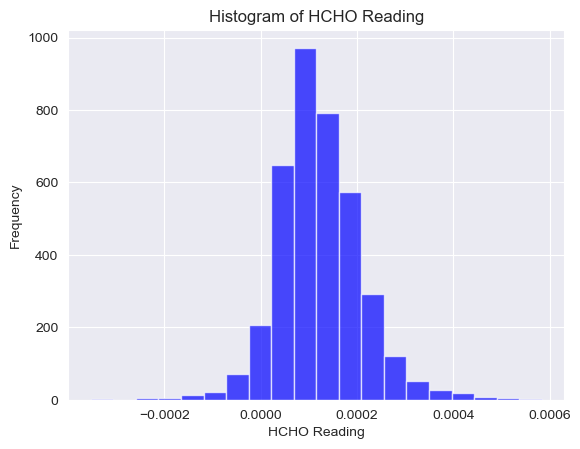

In [8]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas DataFrame for plotting
pandas_df = mon_kur_jaf_data.toPandas()

# Plotting histogram for 'HCHO Reading' column
plt.hist(pandas_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()


In [9]:
# Calculate the mean of 'HCHO Reading' column
hcho_mean = mon_kur_jaf_data.select(pyspark_functions.mean('HCHO Reading')).collect()[0][0]

# Replace null values in 'HCHO Reading' column with the calculated mean
mon_kur_jaf_data_imputed = mon_kur_jaf_data.withColumn('HCHO Reading',
                                       pyspark_functions.when(mon_kur_jaf_data['HCHO Reading'].isNull(),
                                                              hcho_mean).otherwise(
                                           mon_kur_jaf_data['HCHO Reading']))
# Show the DataFrame with null values replaced by mean value in 'HCHO Reading' column
mon_kur_jaf_data_imputed.show()


+--------------------+------------------+------------+----------+
|        HCHO Reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|1.221495984357837E-4|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|1.221495984357837E-4|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|1.221495984357837E-4|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|1.2214959

In [10]:
# Check if there are any null values left
mon_kur_jaf_data_imputed.select(*[pyspark_functions.sum(pyspark_functions.col(c).isNull().cast("int")).alias(c) for c in
                          mon_kur_jaf_data_imputed.columns]).show()



+------------+--------+------------+---------+
|HCHO Reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|           0|       0|           0|        0|
+------------+--------+------------+---------+


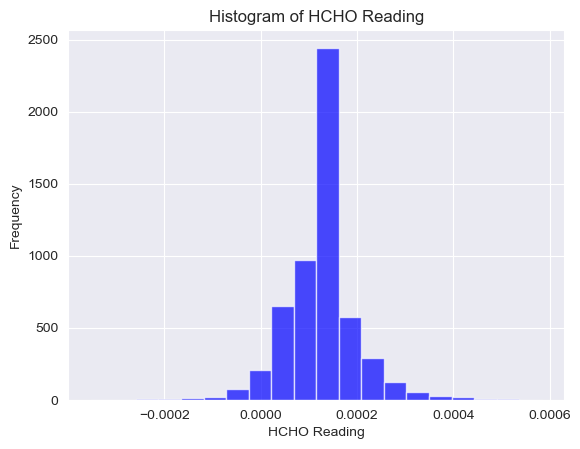

In [11]:
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas DataFrame for plotting
pandas_df = mon_kur_jaf_data_imputed.toPandas()

# Plotting histogram for 'HCHO Reading' column
plt.hist(pandas_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()


In [12]:
# Remove duplicates
col_mat_nuw_data_no_duplicates = mon_kur_jaf_data_imputed.dropDuplicates()

# Show the DataFrame without duplicates
col_mat_nuw_data_no_duplicates.show()
# Loop through each column
for col_name in mon_kur_jaf_data_imputed.columns:
    # Select the column and get distinct values
    unique_values = mon_kur_jaf_data_imputed.select(col_name).distinct()
    # Convert the result to a list and print
    unique_values_list = [row[col_name] for row in unique_values.collect()]
    print(f"Unique values in column '{col_name}':")
    for value in unique_values_list:
        print(value)
    print()


+--------------------+------------------+------------+----------+
|        HCHO Reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|-2.39045708440244...|Bibile, Monaragala|  2019-08-29|2019-08-30|
|1.221495984357837E-4|Bibile, Monaragala|  2020-07-26|2020-07-27|
|1.221495984357837E-4|Bibile, Monaragala|  2022-01-02|2022-01-03|
|1.221495984357837E-4|Bibile, Monaragala|  2022-02-23|2022-02-24|
|1.577144275662697...|Bibile, Monaragala|  2022-04-19|2022-04-20|
|1.221495984357837E-4|Bibile, Monaragala|  2022-05-31|2022-06-01|
|7.446146404588103E-5|Bibile, Monaragala|  2023-04-09|2023-04-10|
|1.479111626109874...|Bibile, Monaragala|  2023-09-19|2023-09-20|
|1.892068657825537...| Kurunegala Proper|  2019-03-07|2019-03-08|
|7.641586794332751E-5| Kurunegala Proper|  2019-06-12|2019-06-13|
|1.095716652343981E-4| Kurunegala Proper|  2019-07-06|2019-07-07|
|1.2214959

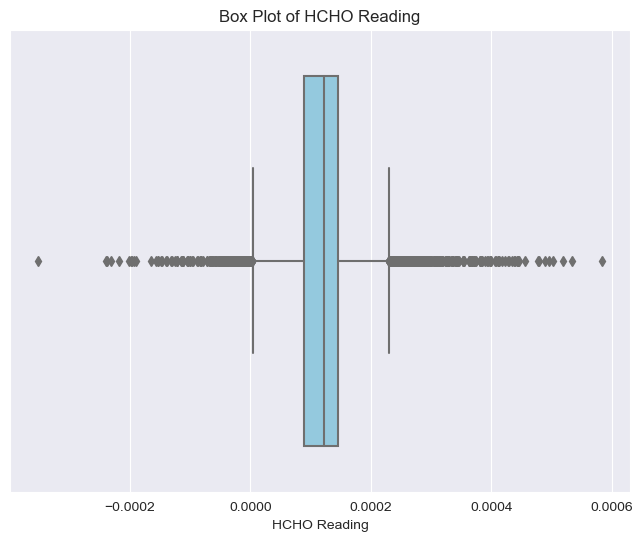

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = mon_kur_jaf_data_imputed.select('HCHO Reading').toPandas()

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=pandas_df['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.show()


In [18]:
from pyspark.sql.functions import col

# Filter out rows with 'HCHO Reading' above 0.0008
col_mat_nuw_data_filtered = mon_kur_jaf_data_imputed.filter(col('HCHO Reading') <= 0.0006)

# Show the DataFrame after removing outliers
col_mat_nuw_data_filtered.show()


+--------------------+------------------+------------+----------+
|        HCHO Reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|1.221495984357837E-4|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|1.221495984357837E-4|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|1.221495984357837E-4|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|1.2214959

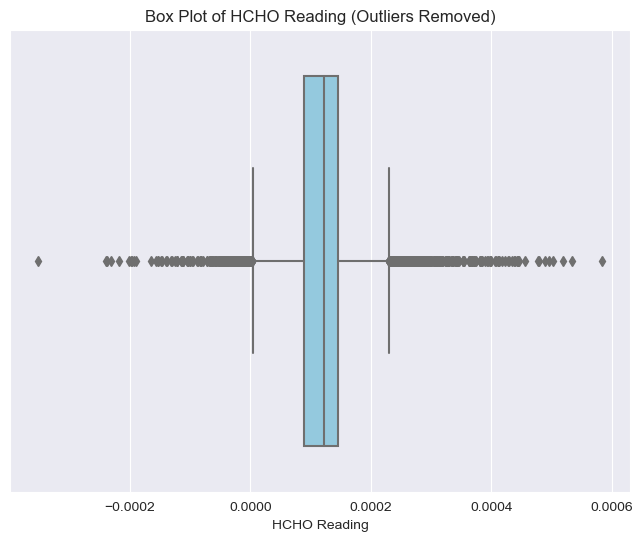

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the filtered Spark DataFrame to Pandas DataFrame for plotting
pandas_df_filtered = col_mat_nuw_data_filtered.select('HCHO Reading').toPandas()

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=pandas_df_filtered['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading (Outliers Removed)')
plt.xlabel('HCHO Reading')
plt.show()
